In [44]:
# EDA
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Visualizações
import plotly.express as px

# Preparação dos dados
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Ramdom Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, f1_score, confusion_matrix, \
                            ConfusionMatrixDisplay, log_loss, roc_auc_score, roc_curve, \
                            precision_score

# Otimização de Hiperparãmetros
import optuna

### Carregar os Dados

In [45]:
# Carregar o Dataset
df_employees = pd.read_csv('.\dataset\employee_churn.csv', 
                          parse_dates=['data_contratacao', 'data_demissao', 'data_ultimo_feedback',
                                       'data_ultimo_aumento', 'data_ultima_mudanca_cargo'],
                          date_format='%Y-%m-%d')  

<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Carolina\AppData\Local\Temp\ipykernel_19536\2338481280.py:2: SyntaxWarning:

invalid escape sequence '\d'



In [46]:
# Visualizar estrutura do Dataset
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         2000 non-null   object        
 1   idade                      2000 non-null   int64         
 2   genero                     2000 non-null   object        
 3   estado_civil               2000 non-null   object        
 4   educacao                   2000 non-null   object        
 5   regime_trabalho            2000 non-null   object        
 6   data_contratacao           2000 non-null   datetime64[ns]
 7   data_demissao              286 non-null    datetime64[ns]
 8   tipo_demissao              286 non-null    object        
 9   cargo                      2000 non-null   object        
 10  salario_atual              2000 non-null   int64         
 11  data_ultimo_feedback       2000 non-null   datetime64[ns]
 12  data_u

In [47]:
# Mostrar primeiras linhas
df_employees.tail(20)

,id,idade,genero,estado_civil,educacao,regime_trabalho,data_contratacao,data_demissao,tipo_demissao,cargo,salario_atual,data_ultimo_feedback,data_ultimo_aumento,data_ultima_mudanca_cargo,nota_avaliacao,acompanhamento_psicologo,qtde_projetos,qtde_clientes,nivel_satisfacao_gestor,churn
1980,EMP1745,40,M,Casado(a),Technical Degree,Presencial,2024-07-08,NaT,NaN,UX Designer,6751,2024-09-27,2024-08-04,2024-07-09,6.5,False,5,4,1.3,0
1981,EMP0323,46,Outro,Divorciado(a),Technical Degree,Híbrido,2024-07-09,NaT,NaN,Tech Lead,7962,2024-08-15,2024-10-12,2024-08-21,8.4,True,9,1,3.2,0
1982,EMP0047,26,M,Solteiro(a),Master,Presencial,2024-07-10,NaT,NaN,Data Scientist,22749,2024-08-18,2024-08-09,2024-07-17,9.3,True,7,1,6.3,0
1983,EMP0063,24,Outro,Divorciado(a),Bachelor,Remoto,2024-07-11,NaT,NaN,Tech Lead,17891,2024-09-01,2024-08-04,2024-07-23,7.4,False,5,6,2.1,0
1984,EMP1864,46,M,Casado(a),Technical Degree,Presencial,2024-07-12,NaT,NaN,Senior Developer,10274,2024-08-03,2024-08-14,2024-10-20,6.1,True,6,1,7.6,0
1985,EMP1333,39,Outro,Divorciado(a),Bachelor,Remoto,2024-07-12,2024-09-20,Voluntária,Tech Lead,11728,2024-09-04,2024-08-02,2024-07-12,9.9,True,8,1,9.6,1
1986,EMP0071,24,Outro,Divorciado(a),Technical Degree,Híbrido,2024-07-12,2024-10-20,Voluntária,UX Designer,13659,2024-07-24,2024-07-18,2024-10-03,9.9,False,6,6,3.3,1
1987,EMP1740,39,M,Casado(a),Master,Híbrido,2024-07-12,NaT,NaN,Tech Lead,20329,2024-08-04,2024-09-28,2024-08-10,6.8,True,3,1,7.5,0
1988,EMP1858,44,M,Casado(a),Technical Degree,Híbrido,2024-07-14,NaT,NaN,Tech Lead,20987,2024-10-16,2024-10-01,2024-07-17,9.7,False,8,7,9.5,0
1989,EMP0688,26,F,Solteiro(a),PhD,Híbrido,2024-07-15,NaT,NaN,QA Engineer,9846,2024-10-07,2024-09-06,2024-10-01,8.5,True,3,7,2.1,0


- Após carregar os dados e visualizar a estrutura, foi obsevado que as variáveis do tipo data não estavam com a tipagem correta, por tanto, foi necessário voltar à celula de carga do dataset e para fazer a transformação das variáveis, direto no carregamento do dataset

### Feature Engineering

In [48]:
# Criar features baseadas em datas (diferenças em dias)

# Calcular o tempo de empresa
df_employees['tempo_empresa'] = df_employees.apply(lambda x:
    (pd.Timestamp.now() - x['data_contratacao']).days if x['churn'] == 0 
    else (x['data_demissao'] - x['data_contratacao']).days, axis=1)

# Calcular tempo desde o ultimo feedbak
df_employees['dias_desde_ultimo_feedback'] = (pd.Timestamp.now() - df_employees['data_ultimo_feedback']).dt.days

# Calcular tempo desde o ultimo aumentos
df_employees['dias_desde_ultimo_aumento'] = (pd.Timestamp.now() - df_employees['data_ultimo_aumento']).dt.days

# Calcular tempo desde a ultima mudança de cargo
df_employees['dias_desde_ultima_mudanca_cargo'] = (pd.Timestamp.now() - df_employees['data_ultima_mudanca_cargo']).dt.days



In [49]:
# Remover coluna ID
df_employees.drop(columns=['id'], inplace=True, axis=1)

In [50]:
df_employees.head()

,idade,genero,estado_civil,educacao,regime_trabalho,data_contratacao,data_demissao,tipo_demissao,cargo,salario_atual,...,nota_avaliacao,acompanhamento_psicologo,qtde_projetos,qtde_clientes,nivel_satisfacao_gestor,churn,tempo_empresa,dias_desde_ultimo_feedback,dias_desde_ultimo_aumento,dias_desde_ultima_mudanca_cargo
0,37,F,Divorciado(a),Master,Remoto,2020-01-02,NaT,NaN,Senior Developer,10207,...,9.6,True,5,1,7.0,0,1950,361,644,914
1,45,Outro,Divorciado(a),Master,Remoto,2020-01-03,NaT,NaN,UX Designer,23921,...,8.4,True,8,4,9.1,0,1949,395,603,1179
2,54,M,Viúvo(a),Technical Degree,Híbrido,2020-01-04,NaT,NaN,Tech Lead,15298,...,8.5,False,9,7,1.3,0,1948,689,1226,1456
3,44,M,Casado(a),Bachelor,Remoto,2020-01-05,NaT,NaN,QA Engineer,15306,...,7.9,False,8,4,8.4,0,1947,1248,1220,248
4,53,Outro,Viúvo(a),PhD,Presencial,2020-01-07,NaT,NaN,Senior Developer,17723,...,7.5,True,5,2,8.2,0,1945,1158,534,270


### EDA

In [51]:
# Varificação de valores ausentes
print('Valores ausentes por coluna: '), df_employees.isnull().sum()

Valores ausentes por coluna: 


(None,
 idade                                 0
 genero                                0
 estado_civil                          0
 educacao                              0
 regime_trabalho                       0
 data_contratacao                      0
 data_demissao                      1714
 tipo_demissao                      1714
 cargo                                 0
 salario_atual                         0
 data_ultimo_feedback                  0
 data_ultimo_aumento                   0
 data_ultima_mudanca_cargo             0
 nota_avaliacao                        0
 acompanhamento_psicologo              0
 qtde_projetos                         0
 qtde_clientes                         0
 nivel_satisfacao_gestor               0
 churn                                 0
 tempo_empresa                         0
 dias_desde_ultimo_feedback            0
 dias_desde_ultimo_aumento             0
 dias_desde_ultima_mudanca_cargo       0
 dtype: int64)

In [52]:
# Distribuição da variável target em percentual
fig = px.bar(df_employees['churn'].value_counts()/ len(df_employees) * 100,
             title='Fator de Churn',
             labels={'index': 'Churn', 'value': 'Percentual'},
             opacity=0.8
             )

fig.update_layout(showlegend=False)
fig.show()


- Nota-se uma base desbalanceada, quantidade muito grande numa base em relação a outra

In [53]:
# Valores possíveis para variáveis categóricas
for col in df_employees.select_dtypes(include=['object']).columns:
    print(f'Valores possíveis em {col}:\n{df_employees[col].unique()}\n')

Valores possíveis em genero:
['F' 'Outro' 'M']

Valores possíveis em estado_civil:
['Divorciado(a)' 'Viúvo(a)' 'Casado(a)' 'Solteiro(a)']

Valores possíveis em educacao:
['Master' 'Technical Degree' 'Bachelor' 'PhD']

Valores possíveis em regime_trabalho:
['Remoto' 'Híbrido' 'Presencial']

Valores possíveis em tipo_demissao:
[nan 'Involuntária' 'Voluntária']

Valores possíveis em cargo:
['Senior Developer' 'UX Designer' 'Tech Lead' 'QA Engineer'
 'Junior Developer' 'Product Manager' 'DevOps Engineer' 'Data Scientist']



In [54]:
# Estatísticas descritivas das variáveis numéricas
round(df_employees.select_dtypes(include=['int64', 'float64']).describe(), 2)

,idade,salario_atual,nota_avaliacao,qtde_projetos,qtde_clientes,nivel_satisfacao_gestor,churn,tempo_empresa,dias_desde_ultimo_feedback,dias_desde_ultimo_aumento,dias_desde_ultima_mudanca_cargo
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,37.94,14801.83,8.00,4.98,4.00,5.49,0.14,1025.66,680.90,694.00,681.14
std,9.46,5763.45,1.16,2.59,1.99,2.61,0.35,512.64,395.60,397.62,395.91
min,22.00,5016.00,6.00,1.00,1.00,1.00,0.00,34.00,194.00,195.00,194.00
25%,30.00,9844.25,7.00,3.00,2.00,3.30,0.00,590.50,350.75,356.75,354.75
50%,38.00,14822.50,8.00,5.00,4.00,5.50,0.00,1024.50,579.50,594.00,571.00
75%,46.00,19702.50,9.00,7.00,6.00,7.70,0.00,1463.00,920.25,953.25,914.00
max,54.00,24988.00,10.00,9.00,7.00,10.00,1.00,1950.00,1913.00,1866.00,1906.00


In [55]:
# BoxPlots para variáveis numéricas com Churn
for col in df_employees.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'churn':
        fig = px.box(df_employees, x='churn', y=col, title=f'BoxPlot de {col} vs Churn', color='churn')
        fig.show()

#### Padrões de Churn indentificados:
- Tempo de Empresa: as pessoas que sairam tinham na mediana 391 dias

- Dias Desde Último Feedback: as pessoas que sairam estavam na mediana a mais de 800 dias sem feedback

- Dias Desde Último Aumento: as pessoas que sairam estavam na mediana a mais de 800 dias sem receber aumento

- Dias Desde a Última Mudança de Cargo: as pessoas que sairam estavam na mediana a mais de 800 dias em mudar de cargo

In [56]:
# Matriz de Correlação
col_number = df_employees.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_employees[col_number].corr()

fig = px.imshow(corr_matrix,
                title='Matriz de Correlação',
                color_continuous_scale='Viridis',
                zmin=-1,
                zmax=1)

fig.update_traces(text=corr_matrix, texttemplate="%{text:.1%}", textfont={'size': 9})
fig.update_layout(
    width=1000,
    height=600,
    title_font=dict(size=14),
    font=dict(size=10)
)

fig.show()

In [57]:
# Matriz de Dispersão

fig = px.scatter_matrix(df_employees, dimensions=col_number,
                        color='churn', title='Matriz de Dispersão')

fig.update_layout(
    width=1200,
    height=1000,
    title_font=dict(size=14),
    font=dict(size=9)
)

fig.show()

In [60]:
# Teste de hipóteses para variáveis categóricas vs Churn
col_cat = df_employees.select_dtypes(include=['object']).columns
for col in col_cat:
    contingency_table = pd.crosstab(df_employees['churn'], df_employees[col])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f'\nTeste Chi-quadrado pra {col} VS Churn:')
    print(f'P-Valor :{p_value}')
    if p_value <= 0.051:
        print(f'As variáveis {col} e Churn não são independentes')
    else:
        print(f'As variáveis {col} e Churn são independentes')


Teste Chi-quadrado pra genero VS Churn:
P-Valor :0.6391382063144609
As variáveis genero e Churn são independentes

Teste Chi-quadrado pra estado_civil VS Churn:
P-Valor :0.8332629331272039
As variáveis estado_civil e Churn são independentes

Teste Chi-quadrado pra educacao VS Churn:
P-Valor :0.20475149121388256
As variáveis educacao e Churn são independentes

Teste Chi-quadrado pra regime_trabalho VS Churn:
P-Valor :0.9751275918764937
As variáveis regime_trabalho e Churn são independentes

Teste Chi-quadrado pra tipo_demissao VS Churn:
P-Valor :1.0
As variáveis tipo_demissao e Churn são independentes

Teste Chi-quadrado pra cargo VS Churn:
P-Valor :0.4586024122014406
As variáveis cargo e Churn são independentes


In [61]:
# Gráficos de Barras para variáveis categóricas vc Churn
for col in col_cat:
    fig = px.histogram(df_employees, x=col, color='churn', barmode='group',
                       title=f'Distribuição de {col} por Churn')
    fig.show()

### Preparação dos Dados

In [63]:
# Separar as Features e Target

# Seleção de colunas com base no tipo datetime
colunas_data = list(df_employees.select_dtypes(include=['datetime64']).columns)

# X e y
X = df_employees.drop(columns=['churn', 'tipo_demissao'] + colunas_data, axis=1)
y = df_employees['churn']

In [64]:
# Criar um preprocessador

# Lista de Colunas por Tipo
features_numericas = X.select_dtypes(include=['int64', 'float64']).columns
features_categoricas = X.select_dtypes(include=['object']).columns

# Preprocessador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)
    ]
)

In [67]:
# Dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=51, shuffle=True)

# Aplicar o Column Transformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Mostrar Conjuntos
print(X_train.shape, X_test.shape)


(1000, 32) (1000, 32)


### Treinamento do modelo - Baseline

In [70]:
# Criar modelo de RandomForest
rf_model= RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=51,
    max_features='sqrt',
    # para datasets com classes desbalanceadas (anomalias, churn)
    class_weight='balanced'
)

In [72]:
# Treinar o Modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, random_state=51)

### Análise dos Resultados - Baseline

In [73]:
# Fazer predições (Classificações - 0 ou 1)
y_pred = rf_model.predict(X_test)

In [75]:
# Mostrar y_pred
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [74]:
# Retornar as Probabilidades das previsões
y_pred_prob = rf_model.predict_proba(X_test)

In [76]:
# Mostrar Probabilidades
y_pred_prob

array([[1.  , 0.  ],
       [0.97, 0.03],
       [0.92, 0.08],
       ...,
       [0.97, 0.03],
       [0.48, 0.52],
       [0.51, 0.49]])

In [77]:
#Avaliação do Modelo
print('Relatório de Classificação')
print(classification_report(y_test, y_pred))

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       855
           1       1.00      0.48      0.64       145

    accuracy                           0.92      1000
   macro avg       0.96      0.74      0.80      1000
weighted avg       0.93      0.92      0.91      1000



In [78]:
# Retornar os valores da Curva ROC - TPR vs FPR e Threshould (Pontos de Corte)
fpr, tpr, threshoulds = roc_curve(y_test, y_pred_prob[:, 1])

In [79]:
# Calcular AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

In [88]:
# Plotar a Curva ROC com valor do AUC
fig = px.area(
    x=fpr,
    y=tpr,
    title=f'Curva ROC (AUC={roc_auc:.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width= 700,
    height=500
)

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

#.update_xaxes(constrain='domain')
#fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.show()

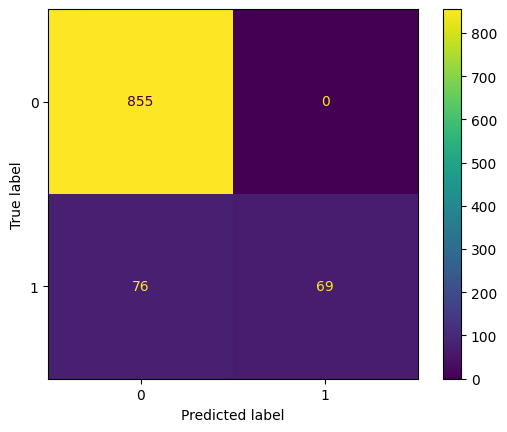

In [94]:
# Mostar a Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(conf_matrix)
fig.plot()

In [95]:
# Calcular Log Loss
print(f'Log Loss: {log_loss(y_test, y_pred_prob):.4f}')

Log Loss: 0.2371
